In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train_data.csv")
df.head()

,Year,Economy,Economy Label,Sex,Sex Label,AgeClass,AgeClass Label,Absolute value in thousands_x,Series,Series Label,Persons per hundred persons aged 15-64,Annual average growth rate,Absolute value in thousands_y,Urban population as percentage of total population
0,2025,120,Cameroon,0,Both sexes,6,[25-29],2339.684,7122.0,Child dependency ratio,73.794,2.50139,30150.781,60.46432
1,2019,450,Madagascar,1,Female,16,[75-79],74.558,7122.0,Child dependency ratio,70.511,2.48242,27533.134,37.86120
2,1994,392,Japan,0,Both sexes,16,[75-79],3285.785,7120.0,Total dependency ratio,43.623,0.25120,125119.269,77.88111
3,1955,292,Gibraltar,0,Both sexes,21,[100+],0.000,7120.0,Total dependency ratio,45.978,0.46316,21.541,100.00000
4,2029,659,Saint Kitts and Nevis,1,Female,16,[75-79],0.599,7122.0,Child dependency ratio,25.747,0.09746,48.200,32.16300


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4452987 entries, 0 to 4452986
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   Year                                                int64  
 1   Economy                                             int64  
 2   Economy Label                                       object 
 3   Sex                                                 int64  
 4   Sex Label                                           object 
 5   AgeClass                                            int64  
 6   AgeClass Label                                      object 
 7   Absolute value in thousands_x                       float64
 8   Series                                              float64
 9   Series Label                                        object 
 10  Persons per hundred persons aged 15-64              float64
 11  Annual average growth rate           

In [5]:
import matplotlib.pyplot as plt

In [6]:
male_df = df[df["Sex Label"]=="Male"]
female_df = df[df["Sex Label"]=="Female"]

In [7]:
male_df.shape

(1483855, 14)

In [8]:
female_df.shape

(1485408, 14)

In [9]:
male_p_year = male_df.groupby('Year').size()
female_p_year = female_df.groupby('Year').size()

In [10]:
male_p_year.shape

(101,)

In [11]:
male_p_year.head()

Year
1950    14331
1951    14383
1952    14396
1953    14345
1954    14398
dtype: int64

In [12]:
female_p_year.shape

(101,)

In [13]:
female_p_year.head()

Year
1950    14491
1951    14424
1952    14410
1953    14397
1954    14401
dtype: int64

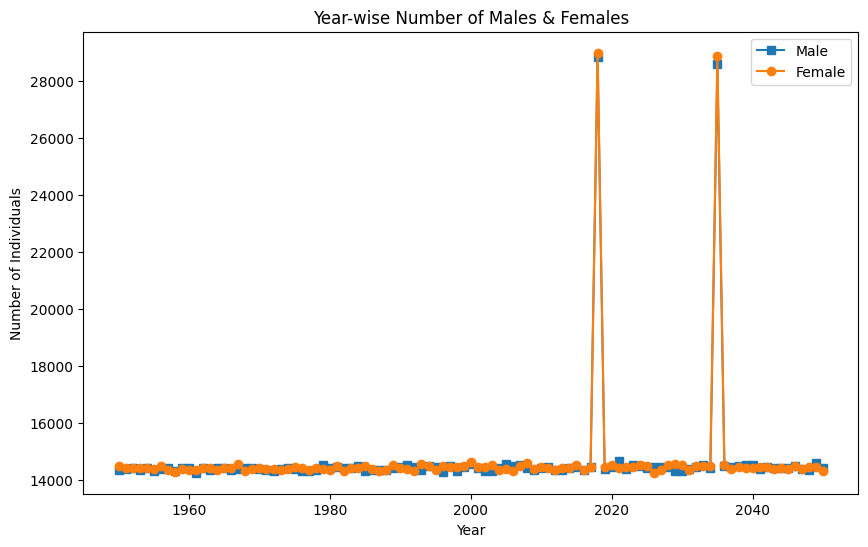

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(male_p_year.index, male_p_year.values, label='Male', marker='s')
plt.plot(female_p_year.index, female_p_year.values, label='Female', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')
plt.title('Year-wise Number of Males & Females')
plt.legend()
plt.show()

Removing the outliers

In [15]:
threshold_male = male_p_year.quantile(0.95)
threshold_female = female_p_year.quantile(0.95)
filtered_male_df = male_p_year[male_p_year < threshold_male]
filtered_female_df = female_p_year[female_p_year < threshold_female]

In [16]:
filtered_male_df.shape

(95,)

In [17]:
filtered_female_df.shape

(95,)

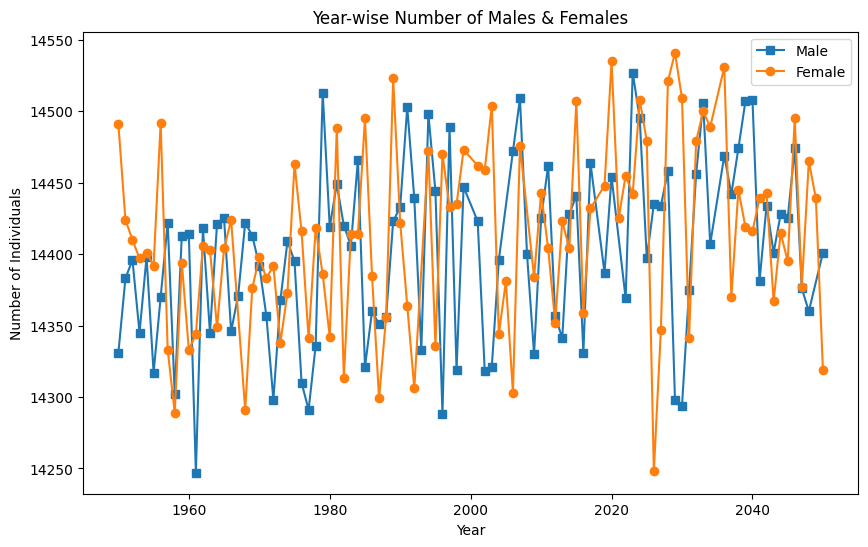

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_male_df.index, filtered_male_df.values, label='Male', marker='s')
plt.plot(filtered_female_df.index, filtered_female_df.values, label='Female', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')
plt.title('Year-wise Number of Males & Females')
plt.legend()
plt.show()

Histogram

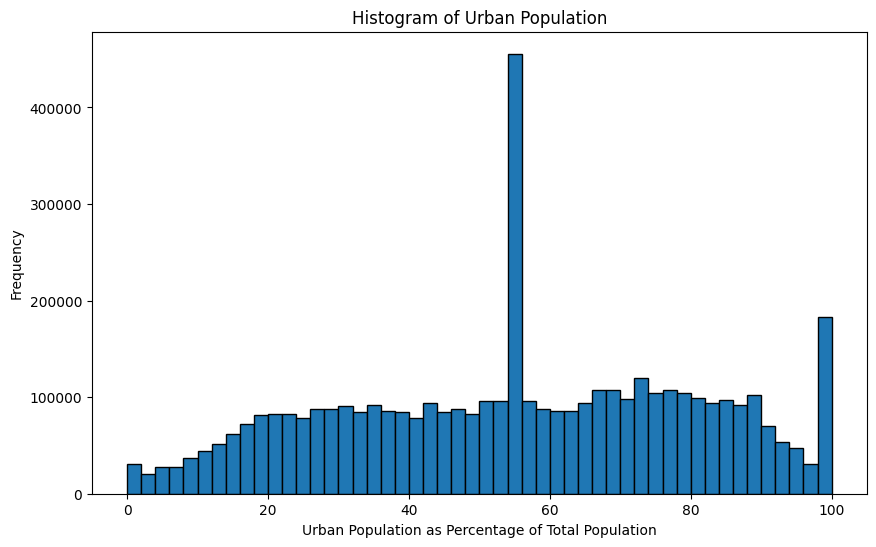

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Urban population as percentage of total population'], bins=50, edgecolor='k')
plt.xlabel('Urban Population as Percentage of Total Population')
plt.ylabel('Frequency')
plt.title('Histogram of Urban Population')
plt.show()

In [33]:
urban_pop_95th_percentile = df['Urban population as percentage of total population'].quantile(0.95)
urban_pop_95th_percentile

95.48595

In [32]:
urban_population = df['Urban population as percentage of total population']
outliers = urban_population[urban_population > urban_pop_95th_percentile]
print(outliers)

3          100.00000
127         98.57388
153        100.00000
191        100.00000
201        100.00000
             ...    
4452885     99.83915
4452891    100.00000
4452893     95.58401
4452914    100.00000
4452975     98.52647
Name: Urban population as percentage of total population, Length: 222581, dtype: float64


Boxplot

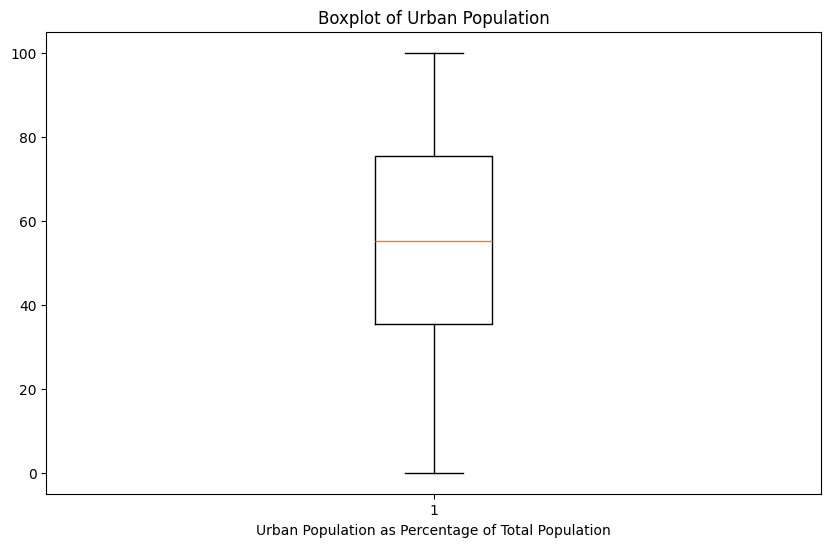

In [31]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Urban population as percentage of total population'])
plt.xlabel('Urban Population as Percentage of Total Population')
plt.title('Boxplot of Urban Population')
plt.show()